# Dataset Exploration -  N-CMAPSS DS02

The new C-MAPSS dataset DS02 from NASA provides degradation trajectories of 9 turbofan engines with unknown and different initial health condition for complete flights and two failure modes (HPT efficiency degradation & HPT efficiency degradation combined with LPT efficiency and capacity degradation). The data were synthetically generated with the Commercial Modular Aero-Propulsion System Simulation (C-MAPSS) dynamical model. The data contains multivariate sensors readings of the complete run-to-failure trajectories. Therefore, the records stop at the cycle/time the engine failed. A total number of 6.5M time stamps are available.

Copyright (c) by Manuel Arias.

In [1]:
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
### Set-up - Define file location
filename = './data_set/N-CMAPSS_DS04.h5'
name_out = filename.replace('./data_set/','').replace('.h5','.csv')

#### Read Raw Data

In [3]:
# Time tracking, Operation time (min):  0.003
t = time.process_time()  

# Load data
with h5py.File(filename, 'r') as hdf:
        # Development set
        W_dev = np.array(hdf.get('W_dev'))             # W
        X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
        X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
        T_dev = np.array(hdf.get('T_dev'))             # T
        Y_dev = np.array(hdf.get('Y_dev'))             # RUL  
        A_dev = np.array(hdf.get('A_dev'))             # Auxiliary

        # Test set
        W_test = np.array(hdf.get('W_test'))           # W
        X_s_test = np.array(hdf.get('X_s_test'))       # X_s
        X_v_test = np.array(hdf.get('X_v_test'))       # X_v
        T_test = np.array(hdf.get('T_test'))           # T
        Y_test = np.array(hdf.get('Y_test'))           # RUL  
        A_test = np.array(hdf.get('A_test'))           # Auxiliary
        
        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))  
        X_v_var = np.array(hdf.get('X_v_var')) 
        T_var = np.array(hdf.get('T_var'))
        A_var = np.array(hdf.get('A_var'))
        
        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))  
        X_v_var = list(np.array(X_v_var, dtype='U20')) 
        T_var = list(np.array(T_var, dtype='U20'))
        A_var = list(np.array(A_var, dtype='U20'))
                          
W = np.concatenate((W_dev, W_test), axis=0)  
X_s = np.concatenate((X_s_dev, X_s_test), axis=0)
X_v = np.concatenate((X_v_dev, X_v_test), axis=0)
T = np.concatenate((T_dev, T_test), axis=0)
Y = np.concatenate((Y_dev, Y_test), axis=0) 
A = np.concatenate((A_dev, A_test), axis=0) 
    
print('')
print("Operation time (min): " , (time.process_time()-t)/60)
print('')
print ("W shape: " + str(W.shape))
print ("X_s shape: " + str(X_s.shape))
print ("X_v shape: " + str(X_v.shape))
print ("T shape: " + str(T.shape))
print ("A shape: " + str(A.shape))


Operation time (min):  0.3765625

W shape: (9980013, 4)
X_s shape: (9980013, 14)
X_v shape: (9980013, 14)
T shape: (9980013, 10)
A shape: (9980013, 4)


In [4]:
df_A = DataFrame(data=A, columns=A_var)
df_A.describe()

,unit,cycle,Fc,hs
count,9.980013e+06,9.980013e+06,9.980013e+06,9.980013e+06
mean,5.520297e+00,4.369523e+01,2.593727e+00,2.072234e-01
std,2.799720e+00,2.567061e+01,4.911368e-01,4.053170e-01
min,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
25%,3.000000e+00,2.200000e+01,2.000000e+00,0.000000e+00
50%,5.000000e+00,4.300000e+01,3.000000e+00,0.000000e+00
75%,8.000000e+00,6.400000e+01,3.000000e+00,0.000000e+00
max,1.000000e+01,1.000000e+02,3.000000e+00,1.000000e+00


In [5]:
df_W = DataFrame(data=W, columns=W_var)
df_W['unit'] = df_A['unit'].values

In [6]:
df_X_s_u_c = DataFrame(data=X_s, columns=X_s_var) 
df_X_s_u_c['unit'] = df_A['unit'].values
df_X_s_u_c['cycle'] = df_A['cycle'].values
df_X_s_u_c['alt'] = df_W['alt'].values
df_X_s_u_c['Mach'] = df_W['Mach'].values
df_X_s_u_c['TRA'] = df_W['TRA'].values
df_X_s_u_c['T2'] = df_W['T2'].values
df_X_s_u_c

,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf,unit,cycle,alt,Mach,TRA,T2
0,620.536686,1500.497778,1918.887446,1305.895297,19.186726,13.769427,19.462331,24.474988,420.022739,426.578936,16.312785,2229.036206,8790.661678,5.117880,1.0,1.0,3003.0,0.261135,81.386139,514.889127
1,620.212233,1501.026264,1918.174792,1306.704845,19.168470,13.765780,19.472561,24.482789,419.831067,426.528828,16.314777,2229.338301,8790.557024,5.113072,1.0,1.0,3014.0,0.260820,81.386139,514.832078
2,620.691023,1501.435624,1917.553771,1305.988738,19.161991,13.768780,19.459324,24.487983,419.814866,426.332878,16.303461,2227.314527,8793.731801,5.113295,1.0,1.0,3023.0,0.262521,81.386139,514.889656
3,620.355416,1500.911321,1917.426968,1305.531529,19.171850,13.754179,19.460298,24.493184,419.747243,426.108069,16.310728,2227.793004,8792.134355,5.112996,1.0,1.0,3032.0,0.262836,81.386139,514.874556
4,620.591359,1501.437449,1918.752200,1305.696191,19.161257,13.744312,19.455585,24.458775,419.775992,426.066808,16.285185,2228.217157,8796.438082,5.109202,1.0,1.0,3042.0,0.262332,81.386139,514.811204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980008,575.594962,1300.416493,1537.012644,1138.884044,16.588586,13.928236,16.816479,19.332151,251.698566,256.948591,14.448214,1710.470427,8131.187698,2.458707,10.0,85.0,3016.0,0.291501,34.277100,516.547136
9980009,576.234568,1299.882098,1537.765798,1139.599918,16.574192,13.918071,16.826887,19.309744,251.809845,257.064075,14.456533,1714.111240,8123.240798,2.462037,10.0,85.0,3013.0,0.292068,34.277100,516.589850
9980010,575.367322,1300.168884,1534.960755,1138.679258,16.581624,13.921671,16.832350,19.323433,251.871517,257.033246,14.456594,1710.488984,8132.049740,2.460451,10.0,85.0,3010.0,0.291942,34.277100,516.594146
9980011,575.666962,1301.061768,1535.511495,1139.539488,16.571732,13.930149,16.823578,19.315798,251.751500,257.299571,14.464679,1710.823646,8138.051357,2.460564,10.0,85.0,3007.0,0.291312,34.277100,516.567693


In [29]:
#FILTRO DATI CROCIERA


# calcolare la differenza cumulativa tra l'altitudine corrente e quella precedente
diff = df_X_s_u_c['alt'].diff()

# calcolare la differenza cumulativa cumulativa
cum_diff = diff.cumsum()

# definire la finestra di tolleranza come +/- 100 piedi
tolerance = 10
tolerance_window = np.arange(-tolerance, tolerance+1)

# verificare se la differenza cumulativa è all'interno della finestra di tolleranza
is_in_tolerance = cum_diff.isin(tolerance_window)

# calcolare il numero di righe consecutive in cui la differenza cumulativa è all'interno della finestra di tolleranza
consecutive_rows = is_in_tolerance.groupby((is_in_tolerance != is_in_tolerance.shift()).cumsum()).cumcount() + 1

# selezionare solo le righe in cui la differenza cumulativa è all'interno della finestra di tolleranza per almeno 5 righe consecutive
df_crociera = df_X_s_u_c[consecutive_rows >= 10]

# eliminare la colonna aggiunta
#df_crociera = df_crociera.drop(columns=['in_crociera'])

In [30]:
df_crociera

,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf,unit,cycle,alt,Mach,TRA,T2
9,620.041799,1500.664234,1916.234601,1305.861024,19.123505,13.737676,19.405017,24.418301,418.681259,425.116430,16.259657,2226.589993,8785.631365,5.099565,1.0,1.0,3097.0,0.262332,81.386139,514.613094
10,620.301244,1499.892912,1916.399281,1305.863369,19.119261,13.725591,19.409979,24.413033,418.632220,424.930365,16.249359,2228.824080,8789.699489,5.095576,1.0,1.0,3109.0,0.262584,81.386139,514.582412
11,619.959835,1499.843408,1917.680843,1303.844332,19.095936,13.712500,19.395371,24.391390,418.347231,424.814317,16.240785,2228.662601,8789.534469,5.091470,1.0,1.0,3121.0,0.262206,81.386139,514.518157
12,620.110991,1500.126401,1916.897725,1305.109228,19.088924,13.714420,19.379054,24.384908,417.881649,424.532765,16.245421,2227.622495,8788.174487,5.091982,1.0,1.0,3133.0,0.262332,81.386139,514.482950
13,619.896725,1500.431981,1918.051936,1303.850422,19.080103,13.709572,19.381698,24.364031,418.122215,424.247286,16.226246,2228.689203,8779.309000,5.088704,1.0,1.0,3144.0,0.263088,81.386139,514.482763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980004,576.154139,1301.467040,1537.641080,1139.285204,16.570561,13.927467,16.814002,19.304754,251.623819,257.164875,14.443462,1714.388300,8128.825630,2.458956,10.0,85.0,3030.0,0.293832,34.277100,516.634060
9980005,576.080058,1300.864662,1537.560159,1139.332827,16.563366,13.928390,16.807700,19.305490,251.847123,256.890763,14.438958,1713.276460,8128.770851,2.461559,10.0,85.0,3026.0,0.293391,34.277100,516.621883
9980006,576.018401,1300.970449,1535.871114,1138.795513,16.579107,13.928877,16.817980,19.302734,251.757496,257.112295,14.457286,1711.512896,8130.246686,2.459889,10.0,85.0,3023.0,0.292887,34.277100,516.603517
9980007,576.114085,1302.318419,1536.825166,1138.908419,16.560857,13.934323,16.842870,19.325290,251.642256,257.166911,14.450165,1711.816450,8134.498641,2.460947,10.0,85.0,3019.0,0.292383,34.277100,516.587679


In [31]:
def plot_df_color_per_unit(data, variables, labels, size=7, labelsize=17, option='Time', name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)
    leg  = []
    fig  = plt.figure(figsize=(size,max(size,rows*2)))
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    unit_sel  = np.unique(data['unit'])
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for j in unit_sel:
            data_unit = data.loc[data['unit'] == j]
            if option=='cycle':
                time_s = data.loc[data['unit'] == j, 'cycle']
                label_x = 'Time [cycle]'
            else:
                time_s = np.arange(len(data_unit))
                label_x = 'Time [s]'
            ax.plot(time_s, data_unit[variables[n]], '-o', color=color_dic_unit['Unit ' + str(int(j))],
                    alpha=0.7, markersize=5)
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
            leg.append('Unit '+str(int(j)))
        plt.ylabel(labels[n], fontsize=labelsize)    
        plt.xlabel(label_x, fontsize=labelsize)
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        if n==0:
            ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.legend(leg, loc='best', fontsize=labelsize-2) #lower left
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

In [16]:
df_crociera_2

,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf,unit,cycle,alt,Mach,TRA,T2
0,620.041799,1500.664234,1916.234601,1305.861024,19.123505,13.737676,19.405017,24.418301,418.681259,425.116430,16.259657,2226.589993,8785.631365,5.099565,1.0,1.0,3097.0,0.262332,81.386139,514.613094
1,620.301244,1499.892912,1916.399281,1305.863369,19.119261,13.725591,19.409979,24.413033,418.632220,424.930365,16.249359,2228.824080,8789.699489,5.095576,1.0,1.0,3109.0,0.262584,81.386139,514.582412
2,619.959835,1499.843408,1917.680843,1303.844332,19.095936,13.712500,19.395371,24.391390,418.347231,424.814317,16.240785,2228.662601,8789.534469,5.091470,1.0,1.0,3121.0,0.262206,81.386139,514.518157
3,620.110991,1500.126401,1916.897725,1305.109228,19.088924,13.714420,19.379054,24.384908,417.881649,424.532765,16.245421,2227.622495,8788.174487,5.091982,1.0,1.0,3133.0,0.262332,81.386139,514.482950
4,619.896725,1500.431981,1918.051936,1303.850422,19.080103,13.709572,19.381698,24.364031,418.122215,424.247286,16.226246,2228.689203,8779.309000,5.088704,1.0,1.0,3144.0,0.263088,81.386139,514.482763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,574.804662,1303.233094,1543.504738,1144.114388,16.514377,13.751099,16.762725,19.199188,254.902213,260.220141,14.480657,1711.691742,8146.133748,2.506766,1.0,1.0,3014.0,0.260631,34.277100,514.821615
10998,574.611689,1304.285873,1543.064788,1142.942412,16.506383,13.754572,16.759091,19.209680,254.760347,260.053276,14.482691,1711.042236,8139.220681,2.507630,1.0,1.0,3011.0,0.260001,34.277100,514.800039
10999,574.307377,1303.906417,1542.619864,1143.477497,16.509181,13.756383,16.755188,19.213562,254.898616,260.207478,14.477088,1708.955046,8137.092185,2.506167,1.0,1.0,3009.0,0.259749,34.277100,514.793512
11000,574.444348,1303.492232,1544.253044,1144.344556,16.500339,13.759980,16.776465,19.214648,254.638704,260.052226,14.480983,1709.472290,8142.681738,2.506923,1.0,1.0,3006.0,0.259182,34.277100,514.774471


In [54]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import root
x = np.array(np.arange(len(df_X_s_u_c)))
y = np.array(df_X_s_u_c['alt'].to_list())

# calcolare la derivata
dy_dx = np.gradient(y, x)

# trovare i punti stazionari
stationary_points = x[np.where(dy_dx == 0)[0]]

print(stationary_points)

dati_crociera = df_X_s_u_c.iloc[stationary_points]
#plot_df_color_per_unit(selected_rows, W_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')



[   2556    2559    2657 ... 9979327 9979328 9979330]


In [55]:
dati_crociera

,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf,unit,cycle,alt,Mach,TRA,T2
2556,567.795907,1366.322366,1724.662821,1139.269221,10.849925,7.860228,11.018526,13.992674,230.195323,233.543808,8.076833,2142.193446,8364.682826,2.588687,1.0,1.0,22292.0,0.610596,82.352928,471.918857
2559,567.543924,1366.869882,1725.652522,1139.463421,10.843730,7.874355,11.024681,13.998139,230.277435,233.774183,8.092650,2139.440289,8372.443960,2.592031,1.0,1.0,22299.0,0.611730,82.352928,472.012398
2657,568.721493,1367.546921,1726.985685,1139.019128,10.887140,7.875738,11.047441,14.036098,229.869194,233.664170,8.018937,2142.970768,8364.758498,2.589648,1.0,1.0,22543.0,0.627102,82.352928,472.749510
2800,565.108799,1351.829855,1693.107317,1119.055416,10.667390,7.828728,10.814531,13.667880,219.581440,223.235921,7.770351,2109.966653,8314.554557,2.427449,1.0,1.0,22991.0,0.641781,78.309990,472.652647
2803,563.961455,1348.912963,1686.263551,1116.642194,10.603437,7.831927,10.775068,13.588522,217.307178,220.908704,7.745949,2099.221855,8311.393720,2.390156,1.0,1.0,22993.0,0.641970,77.167419,472.666118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979318,574.773030,1325.828014,1597.991106,1146.514698,15.106259,12.222149,15.331644,18.139103,256.774697,261.472293,12.854285,1855.070827,8222.074592,2.628009,10.0,85.0,6888.0,0.326844,46.845371,504.662906
9979325,573.313118,1318.231151,1582.644763,1137.923858,15.033722,12.226612,15.253172,17.985427,251.033955,256.194295,12.779008,1839.338152,8198.870623,2.539772,10.0,85.0,6887.0,0.325836,45.263351,504.601777
9979327,572.278884,1312.974493,1575.799576,1136.227020,14.979510,12.222172,15.208933,17.903384,248.262674,253.135515,12.757781,1827.446409,8181.969228,2.504403,10.0,85.0,6886.0,0.325458,44.384449,504.580773
9979328,571.893563,1313.604659,1573.386554,1136.772669,14.962269,12.231277,15.188798,17.868454,247.722415,252.684452,12.760590,1822.389064,8175.582691,2.495519,10.0,85.0,6887.0,0.325332,44.032890,504.569497


<Figure size 640x480 with 0 Axes>

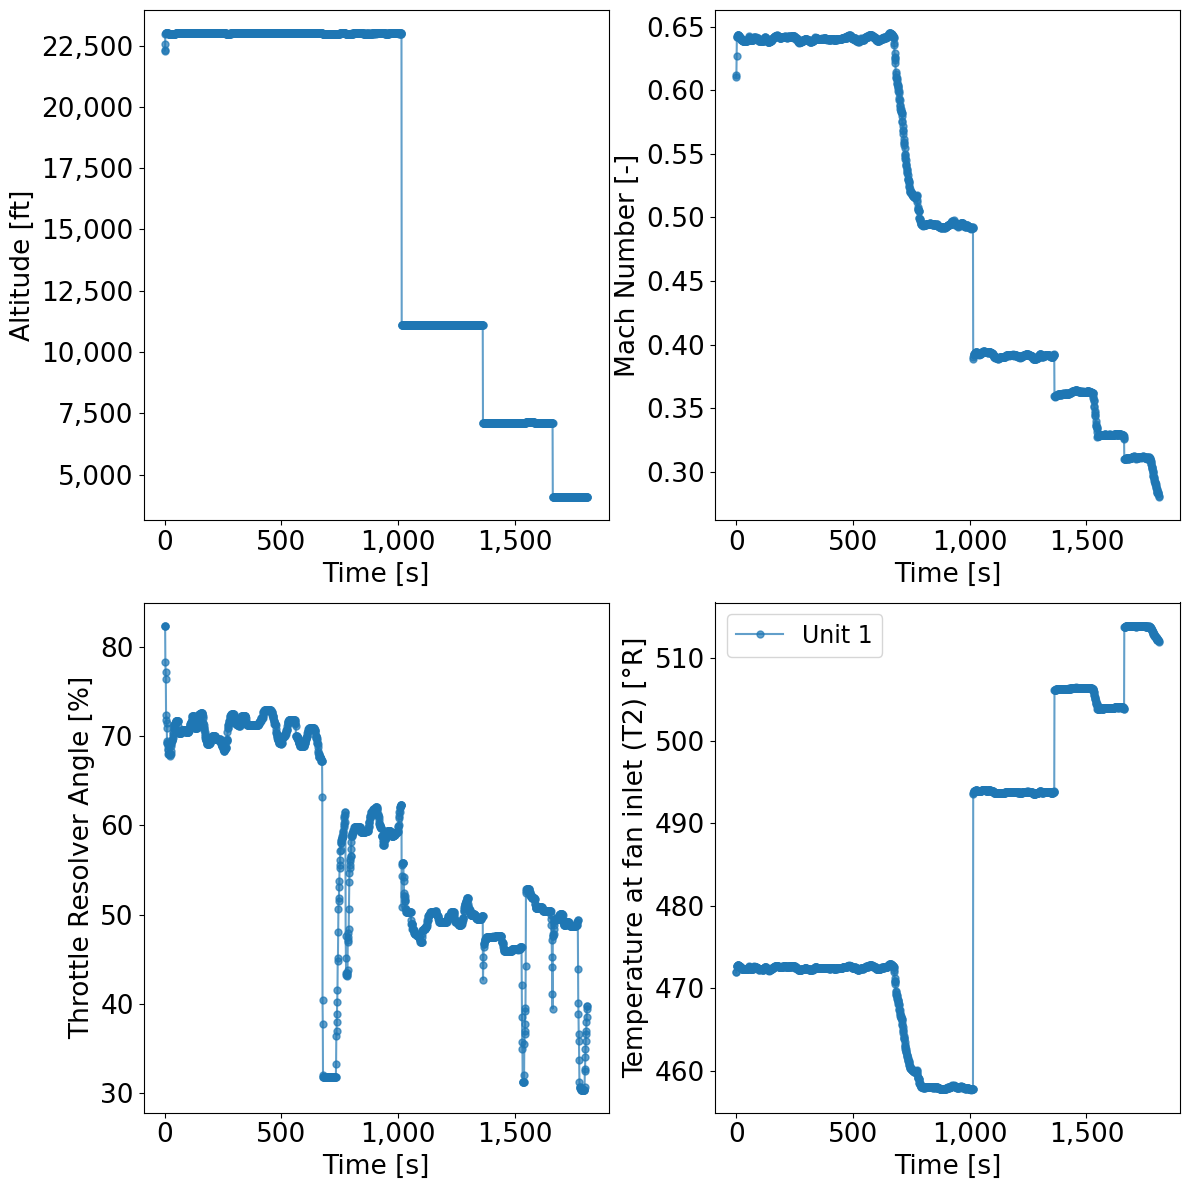

In [56]:
df_crociera_2 = dati_crociera[dati_crociera['unit']==1]
df_crociera_2 = df_crociera_2[df_crociera_2['cycle']==1]
df_crociera_2.reset_index(inplace=True, drop=True)
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet (T2) [°R]']
plot_df_color_per_unit(df_crociera_2, W_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')

In [38]:
selected_rows

,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf,unit,cycle,alt,Mach,TRA,T2
2556,567.795907,1366.322366,1724.662821,1139.269221,10.849925,7.860228,11.018526,13.992674,230.195323,233.543808,8.076833,2142.193446,8364.682826,2.588687,1.0,1.0,22292.0,0.610596,82.352928,471.918857
2559,567.543924,1366.869882,1725.652522,1139.463421,10.843730,7.874355,11.024681,13.998139,230.277435,233.774183,8.092650,2139.440289,8372.443960,2.592031,1.0,1.0,22299.0,0.611730,82.352928,472.012398
2657,568.721493,1367.546921,1726.985685,1139.019128,10.887140,7.875738,11.047441,14.036098,229.869194,233.664170,8.018937,2142.970768,8364.758498,2.589648,1.0,1.0,22543.0,0.627102,82.352928,472.749510
2800,565.108799,1351.829855,1693.107317,1119.055416,10.667390,7.828728,10.814531,13.667880,219.581440,223.235921,7.770351,2109.966653,8314.554557,2.427449,1.0,1.0,22991.0,0.641781,78.309990,472.652647
2803,563.961455,1348.912963,1686.263551,1116.642194,10.603437,7.831927,10.775068,13.588522,217.307178,220.908704,7.745949,2099.221855,8311.393720,2.390156,1.0,1.0,22993.0,0.641970,77.167419,472.666118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979318,574.773030,1325.828014,1597.991106,1146.514698,15.106259,12.222149,15.331644,18.139103,256.774697,261.472293,12.854285,1855.070827,8222.074592,2.628009,10.0,85.0,6888.0,0.326844,46.845371,504.662906
9979325,573.313118,1318.231151,1582.644763,1137.923858,15.033722,12.226612,15.253172,17.985427,251.033955,256.194295,12.779008,1839.338152,8198.870623,2.539772,10.0,85.0,6887.0,0.325836,45.263351,504.601777
9979327,572.278884,1312.974493,1575.799576,1136.227020,14.979510,12.222172,15.208933,17.903384,248.262674,253.135515,12.757781,1827.446409,8181.969228,2.504403,10.0,85.0,6886.0,0.325458,44.384449,504.580773
9979328,571.893563,1313.604659,1573.386554,1136.772669,14.962269,12.231277,15.188798,17.868454,247.722415,252.684452,12.760590,1822.389064,8175.582691,2.495519,10.0,85.0,6887.0,0.325332,44.032890,504.569497


In [ ]:
df_X_s_u_c_mean = df_X_s_u_c.groupby(['unit', 'cycle']).mean()
df_X_s_u_c_mean = pd.DataFrame(df_X_s_u_c_mean).reset_index()
df_X_s_u_c_mean

In [ ]:
df_X_s_u_c_mean.to_csv("./dataset_csv/"+name_out,index=False)